# Using Prophet for S&P 500 forcasting

In [31]:
## Prophet docs can be found here: https://facebook.github.io/prophet/docs/quick_start.html

In [32]:
## This notebooks is published here: https://deepnote.com/publish/e870766e-a2ca-4167-99b6-3cb070a87c2e

In [6]:
import pandas as pd
import numpy as np
import datetime

import quandl

import statsmodels.api as sm
from fbprophet import Prophet

import matplotlib.pyplot as plt

In [7]:
start = datetime.datetime(1960, 1, 1)
end = pd.to_datetime('today')

SP500 = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH",start_date = start,end_date = end)
SP500

,Value
Date,
1960-01-01,58.03
1960-02-01,55.78
1960-03-01,55.02
1960-04-01,55.73
1960-05-01,55.22
...,...
2020-08-01,3391.71
2020-08-31,3500.31
2020-09-01,3365.52


In [14]:
df = SP500
df.head()

,Value
Date,
1960-01-01,58.03
1960-02-01,55.78
1960-03-01,55.02
1960-04-01,55.73
1960-05-01,55.22


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 1960-01-01 to 2020-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   740 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [22]:
df['ds'] = df.index
df['y'] = df.Value

In [23]:
df

,Value,ds,y
Date,,,
1960-01-01,58.03,1960-01-01,58.03
1960-02-01,55.78,1960-02-01,55.78
1960-03-01,55.02,1960-03-01,55.02
1960-04-01,55.73,1960-04-01,55.73
1960-05-01,55.22,1960-05-01,55.22
...,...,...,...
2020-08-01,3391.71,2020-08-01,3391.71
2020-08-31,3500.31,2020-08-31,3500.31
2020-09-01,3365.52,2020-09-01,3365.52


In [24]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1100,2021-09-27
1101,2021-09-28
1102,2021-09-29
1103,2021-09-30
1104,2021-10-01


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1100,2021-09-27,3206.607077,3048.843968,3356.838889
1101,2021-09-28,3203.268280,3056.734891,3342.524510
1102,2021-09-29,3216.464967,3060.886373,3365.919004
1103,2021-09-30,3212.666864,3051.082913,3362.695987
1104,2021-10-01,3219.847641,3063.628335,3370.696458


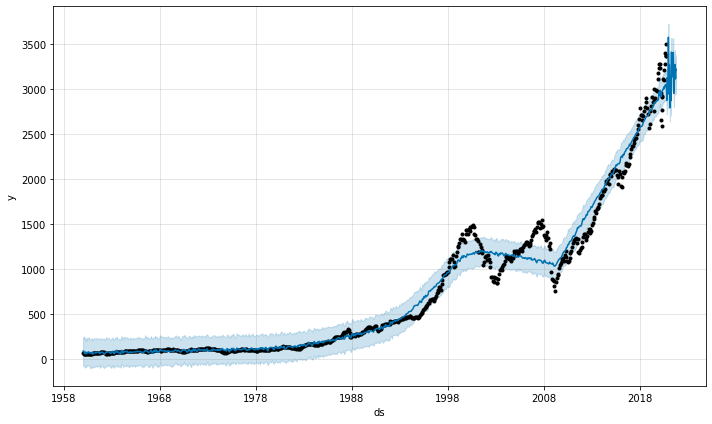

In [27]:
fig1 = m.plot(forecast)

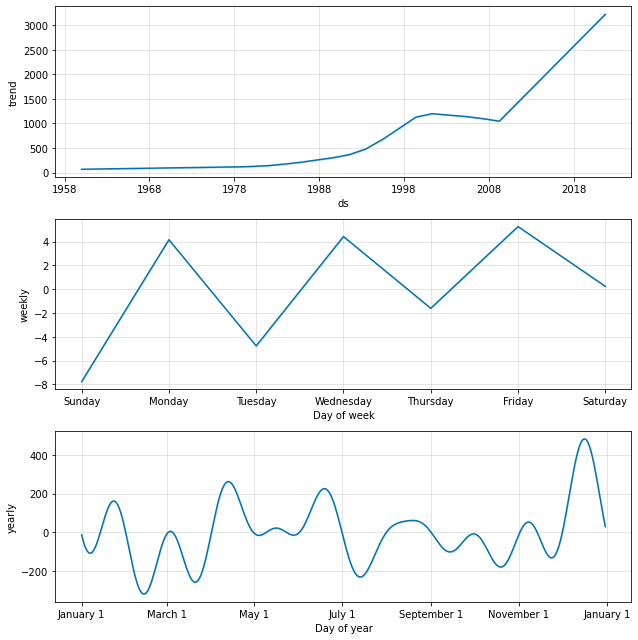

In [28]:
fig2 = m.plot_components(forecast)